# Data Acquisition

**Note**: To run notebooks on the cluster, you will need the Jupyter extension in VSCode and also the *ipykernel* library from the *requirements.txt* in Lecture_1.

## Public Data APIs

Often data for a given task can be found in public data sources, such as:

- https://daten.berlin.de/
- https://www.kaggle.com/datasets
- https://datasetsearch.research.google.com/

Easy to download directly.

## Public ML Data Sets: OpenML

Joaquin Vanschoren set up https://www.openml.org/
- over 20,000 data sets
- there are tasks, like on kaggle, but it's open
- useful API
- great for testing models on variety of data sets

In [ ]:
!pip install -r ../requirements.txt # Install dependencies in your .venv
                                    # Since .venv is inside your persistent volume (/storage/courses/), you only need to install the libraries once.
                                    # Note: restart the kernel after installing the libraries. Click on Restart above.

In [1]:
import pandas as pd
import urllib
import os
import requests
import matplotlib.pyplot as plt
import warnings

In [3]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml("titanic", as_frame=True, return_X_y=True)
X

/storage/courses/.venv/lib/python3.11/site-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name titanic exist. Versions may be fundamentally different, returning version 2. Available versions:
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=40704
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=40945

  warn(warning_msg)


,Class,Age,Sex
0,-1.8700,-0.228,0.521
1,-0.9230,-0.228,-1.920
2,-0.9230,-0.228,-1.920
3,0.9650,-0.228,0.521
4,0.0214,-0.228,0.521
...,...,...,...
2196,0.9650,-0.228,0.521
2197,-0.9230,-0.228,0.521
2198,-1.8700,-0.228,0.521
2199,0.9650,-0.228,0.521


## Getting Data through Python libraries

There are python libraries for all kinds of APIs and data source. 

Here we just look at one for [newspapers](https://github.com/codelucas/newspaper)

In [2]:
from newspaper import Article
article = Article('https://www.sueddeutsche.de/politik/demonstrationen-rassismus-pandemie-1.4936008')
article.download()
article.parse()

With a language independent interface, we can now extract things like title, authors or text

In [3]:
article.title

'"Unteilbar"-Demonstrationen: Neun Kilometer Protest'

In [4]:
article.authors

['Kristiana Ludwig']

In [5]:
article.text

'Die Zeiten haben sich geändert. Wie sehr, das zeigte auch ein ruhiger Sonntagnachmittag in Berlin, an dem mehrere Tausend Menschen gegen Rassismus , soziale Ungerechtigkeit und für den Klimaschutz auf die Straße gingen - und zwar an vielen Orten im Stillen. Während sich im Herbst 2018 unter der Überschrift "Unteilbar" noch mehr als 200 000 Menschen mit Musik- und Lautsprecherwagen durch die Hauptstadt geschoben hatten, passten die Teilnehmer desselben Bündnisses nun ihren Protest dem Infektionsschutz an.\n\nStatt zu marschieren bildeten die Demonstranten auf einer Strecke von rund neun Kilometern eine Menschenkette und hielten dabei meist mehrere Meter Abstand zueinander. Die Veranstalter, ein Bündnis aus 130 Initiativen und Gruppen, hatten bunte Bänder verteilt, die Demonstranten zwischen sich aufspannten - und sie riefen in Lautsprecherdurchsagen dazu auf, Mundschutz zu tragen.\n\nAuch der Anlass des Protests war spürbar aktuell. Mit ihren Transparenten nahmen viele Protestierende a

## Getting tabular data from Wikipedia

Let's look at [some population data from Wikipedia](https://en.wikipedia.org/wiki/Berlin_population_statistics)


In [6]:
berlin_population = pd.read_html("https://en.wikipedia.org/wiki/Berlin_population_statistics", header=0)
df_berlin_population = berlin_population[0][:11].set_index('Borough')
df_berlin_population

,Population 30 September 2010,Area in km2,Largest Non-German ethnic groups
Borough,,,
Mitte,332100,39.47,"Turks, Arabs, Kurds, many Asians, Africans and..."
Friedrichshain-Kreuzberg,268831,20.16,"Turks, Arabs, African, Kurds, Chinese"
Pankow,368956,103.01,"Poles, Italians, French, Americans, Vietnamese..."
Charlottenburg-Wilmersdorf,320014,64.72,"Turks, Africans, Russians, Arabs, others."
Spandau,225420,91.91,"Turks, Africans, Russians, Arabs, others."
Steglitz-Zehlendorf,293989,102.50,"Poles, Turks, Croats, Serbs, Koreans"
Tempelhof-Schöneberg,335060,53.09,"Turks, Croats, Serbs, Koreans, Africans"
Neukölln,310283,44.93,"Arabs, Turks, Kurds, Russians, Africans, Poles"
Treptow-Köpenick,241335,168.42,"Russians, Poles, Ukrainians, Vietnamese"


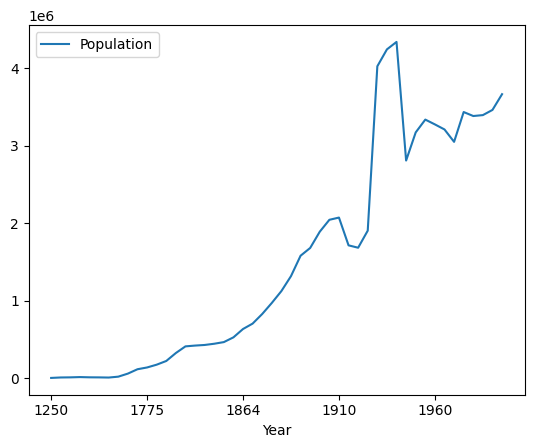

In [7]:
%matplotlib inline
# Concatenate all tables on population statistics
overall_population = pd.concat(berlin_population[2:5])
# Extract the years
overall_population.Year = overall_population.Year.str.extract('(\d{4})', expand=False)
# Set the index to the year column, so plotting is nicer
overall_population = overall_population.set_index("Year")
overall_population.plot();

## Beautiful Soup for Web Scraping

- HTML pages are often not well structured
- [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/)
    - tidies up dirty HTML
    - allows for convenient parsing of HTML
- Every browser offers web developer tools that allow you to inspect how the webpage is built.

### A Simple Webpage

In [9]:
a_simple_webpage = \
"""<html>
    <head>
    </head>
    <body>
        <p>
            A paragraph
        </p>
        <p id="second_paragraph">
           Another paragraph with a <a href="https://de.wikipedia.org/wiki/Beuth_(Lokomotive)">link</a>
        </p>
    </body>
</html>"""

In [10]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(a_simple_webpage, 'html.parser')

In [11]:
list(soup.children)

[<html>
 <head>
 </head>
 <body>
 <p>
             A paragraph
         </p>
 <p id="second_paragraph">
            Another paragraph with a <a href="https://de.wikipedia.org/wiki/Beuth_(Lokomotive)">link</a>
 </p>
 </body>
 </html>]

In [12]:
# Extracting text
paragraphs = soup.find_all('p')
paragraphs

[<p>
             A paragraph
         </p>,
 <p id="second_paragraph">
            Another paragraph with a <a href="https://de.wikipedia.org/wiki/Beuth_(Lokomotive)">link</a>
 </p>]

In [13]:
[p.get_text().strip() for p in paragraphs]

['A paragraph', 'Another paragraph with a link']

In [14]:
# Extracting links
links = soup.find_all('a')
links

[<a href="https://de.wikipedia.org/wiki/Beuth_(Lokomotive)">link</a>]

In [15]:
links[0].get('href')

'https://de.wikipedia.org/wiki/Beuth_(Lokomotive)'

In [16]:
# Extracting arbitrary elements
[x.get_text().strip() for x in soup.find_all(id="second_paragraph")]

['Another paragraph with a link']

## Scraping Images with Selenium

Here is an extensive example of scraping images with Selenium:

[Webscraper_iNat](https://github.com/TeodorChiaburu/beexplainable/blob/main/scripts/webscraper_inat.py)

If you want to play with this script, I recommend doing it on your machine. You can download images in a local folder on your laptop and then just drag and drop it in the remote VSCode window in your PV, for instance under a new path /dsworkflow/data. If the images take up too much space and you need more storage in your PV, just increase the size in *storage.yml* and apply the file again. You don't need to delete it first.

To run the script you will need to install Selenium in your Python environment and also download the appropriate GeckoDriver for your browser (more details in the script).

You can check how full your PV is if you call `du -sh .` while inside the \storage folder.

## Downloading Images in the PV from Google Drive

Theoretically, multiple namespaces can share a common PV. However, this requires admin intervention.

The default setting is: a PV is only visible within the scope of the namespace that created it on the cluster.
We will stick to this default behavior in this course, which means, for instance, that every member of a team working with the same data for the project will have to download their own copy of the data in their own PV. 

In [ ]:
# You can very easily download Google Drive folders, if they are public.
# Here is an example with a folder containing 3 images that I shared.
import gdown
url = "https://drive.google.com/drive/folders/1kpo3edT_k5KLX1GqcOqcHtff4YxfuGMj"
output = "../../../data/"
gdown.download_folder(url=url, output=output)

Retrieving folder contents


Processing file 1TIUDBEdt3PWuzY8TmWEILyulokaCq2DU cheetah.jpg
Processing file 1KOxqSvbdoS79ZKyBv_pjsu7Z2TPcZK4o turtle.jpg
Processing file 10P1EhqHt6tkNqV2OCj2VJsOQWCeV87G- zebra.jpg


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1TIUDBEdt3PWuzY8TmWEILyulokaCq2DU
To: /storage/courses/dsworkflow/data/dsw_gdrive_imgs/cheetah.jpg
100%|██████████| 198k/198k [00:00<00:00, 7.62MB/s]
Downloading...
From: https://drive.google.com/uc?id=1KOxqSvbdoS79ZKyBv_pjsu7Z2TPcZK4o
To: /storage/courses/dsworkflow/data/dsw_gdrive_imgs/turtle.jpg
100%|██████████| 185k/185k [00:00<00:00, 10.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=10P1EhqHt6tkNqV2OCj2VJsOQWCeV87G-
To: /storage/courses/dsworkflow/data/dsw_gdrive_imgs/zebra.jpg
100%|██████████| 263k/263k [00:00<00:00, 9.16MB/s]
Download completed


['../../../data/dsw_gdrive_imgs/cheetah.jpg',
 '../../../data/dsw_gdrive_imgs/turtle.jpg',
 '../../../data/dsw_gdrive_imgs/zebra.jpg']